In [35]:
import pandas as pd #data analysis library
import matplotlib.pyplot as plt #graphing
import seaborn as sns #graphing
from sklearn.linear_model import LinearRegression 
from sklearn import linear_model
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np

poke_df = pd.read_csv("Pokemon.csv")
poke_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [19]:
poke_stats = ['HP', "Attack", "Defense", "Speed"]


In [20]:
poke_df = poke_df.drop(columns = ['#','Name', 'Type 1', 'Type 2', 'Total', 'Sp. Atk', 'Sp. Def', 'Generation', "Legendary"])
poke_df.head()

,HP,Attack,Defense,Speed
0,45,49,49,45
1,60,62,63,60
2,80,82,83,80
3,80,100,123,80
4,39,52,43,65


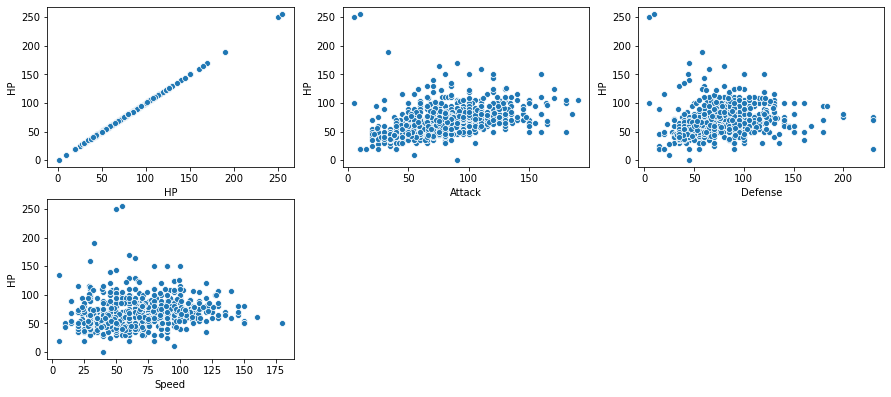

In [21]:
plt.figure(figsize = (15,10)) #horizontal & vertical size in inches
for i in enumerate(poke_stats):
    plt.subplot(3,3,i[0]+1)
    sns.scatterplot(data=poke_df, x=i[1], y = 'HP')

In [22]:
#preprocessing independent variables
x = poke_df.iloc[:,1:4] 
print(x)
atk = poke_df.iloc[:,1]
dfs = poke_df.iloc[:,2]
spd = poke_df.iloc[:,3]


     Attack  Defense  Speed
0        49       49     45
1        62       63     60
2        82       83     80
3       100      123     80
4        52       43     65
..      ...      ...    ...
795     100      150     50
796     160      110    110
797     110       60     70
798     160       60     80
799     110      120     70

[800 rows x 3 columns]


In [23]:
#preprocessing dependent variables
y = poke_df.iloc[:,0]
print (y)

0      45
1      60
2      80
3      80
4      39
       ..
795    50
796    50
797    80
798    80
799    80
Name: HP, Length: 800, dtype: int64


In [24]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2) #20% testing

In [25]:
import statsmodels.api as sm

In [26]:
x_train = sm.add_constant(x_train) #add constant term
#y_train.values.reshape(-1,1)
#y_train = list(y_train)

In [27]:
#regression and fit
result = sm.OLS(y_train, x_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     HP   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     40.18
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           8.66e-24
Time:                        19:42:02   Log-Likelihood:                -2941.9
No. Observations:                 640   AIC:                             5892.
Df Residuals:                     636   BIC:                             5910.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.5104      3.317     12.815      0.0

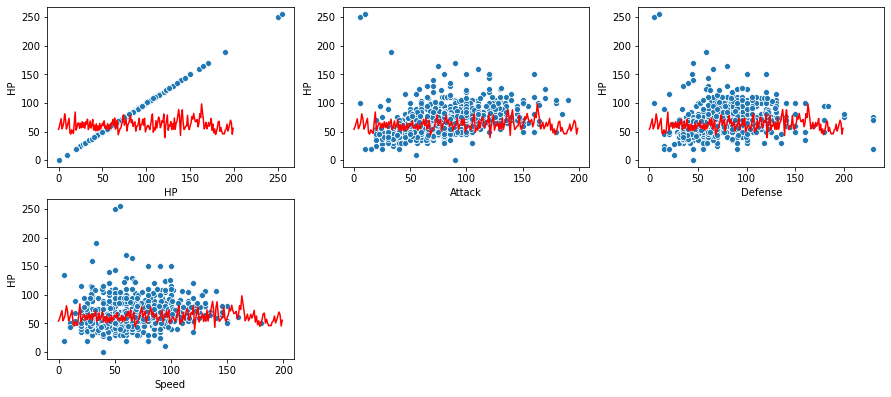

In [28]:
plt.figure(figsize = (15,10)) #horizontal & vertical size in inches
for i in enumerate(poke_stats):
    plt.subplot(3,3,i[0]+1)
    sns.scatterplot(data=poke_df, x=i[1], y = 'HP')
    px = np.arange(0,200,1)
    bias = 37.2368
    py = (0.2940 * atk[px]) + (.0421 * dfs[px]) + (.0089*spd[px]) + bias
    plt.plot(py, 'r')
    plt.show
    
#g(x) = 0.2940*x_1 + 0.0421*x_2 + 0.0089*x_3 + 37.2368

In [94]:
ypred = result.predict(x_train)
print(metrics.mean_absolute_error(y_train, ypred)) #Absolute error
print(metrics.mean_squared_error(y_train, ypred)) #MSE
print(np.sqrt(metrics.mean_squared_error(y_train,ypred))) #RMSE

15.976834409725026
575.6547006588744
23.992805185281576


In [92]:
x_test = sm.add_constant(x_test)

ypred = result.predict(x_test)
print(ypred)
print(y_test)

16.70506354929241
721.618590765531
26.86295945657386
291    55.147824
92     79.557365
593    77.149592
289    55.147824
284    60.644849
         ...    
637    63.780472
14     51.213725
469    59.112258
225    68.309778
46     58.281469
Length: 160, dtype: float64
291    50
92     60
593    85
289    50
284    35
       ..
637    70
14     50
469    76
225    60
46     40
Name: HP, Length: 160, dtype: int64


In [82]:
from sklearn import metrics
#calculating errors
metrics.mean_absolute_error(y_test, ypred) #Absolute error

14.600181127654896

In [83]:
metrics.mean_squared_error(y_test, ypred) #MSE

363.9627210216198

In [84]:
np.sqrt(metrics.mean_squared_error(y_test,ypred)) #RMSE

19.07780702862936

In [85]:
#gradient descent
from sklearn.linear_model import SGDRegressor
sgdr = SGDRegressor( max_iter = 1000,penalty = "elasticnet",loss = 'huber',tol = 1e-3, average = True, learning_rate = 'constant')
sgdr.fit(x_train, y_train)

SGDRegressor(average=True, learning_rate='constant', loss='huber',
             penalty='elasticnet')

In [91]:
lgpred = sgdr.predict(x_train)
print(metrics.mean_absolute_error(y_train, lgpred)) #Absolute error
print(metrics.mean_squared_error(y_train, lgpred)) #MSE
print(np.sqrt(metrics.mean_squared_error(y_train,lgpred))) #RMSE

16.70506354929241
721.618590765531
26.86295945657386


In [86]:
lgpred = sgdr.predict(x_test)
print(lgpred)

[ 32.38797989  84.11977508  72.29440885  32.38797989  38.78627052
  54.1442701   81.65966314  64.91407304  64.48073942  61.53240057
  71.43386957  98.58536994  85.52538988  49.09820124  70.68764208
  75.55359424  69.33214739  59.59926891  56.32293573  56.49687672
  70.00501273  71.7307935   77.62322058  96.20163115  65.30847983
  77.69460637  61.73391567  61.34881427  83.06626613  43.58703582
  72.93359665  58.53219346  63.14643243  46.46965822  90.44239559
  50.04067133  47.71839836  36.3592426   85.9401057   36.3592426
 110.80506499  54.29067773  77.66614658  47.42589149 109.32087028
  62.66388889  80.07092065  83.73913147  82.0180529   89.89176241
  64.26346155  79.28797309  96.24349099  45.38571312  47.52051931
  87.41817245  54.5743308   47.46518144 105.25588996  54.82591127
  74.82105896  73.62871584  88.6749994   86.02239963 101.72669597
 100.92070306  87.4404263   52.50323445  86.91602293  72.45164664
  78.29244987  91.25180335  75.67346369  64.97855687  55.89597449
  56.456283

In [87]:
print(metrics.mean_absolute_error(y_test, lgpred)) #Absolute error
print(metrics.mean_squared_error(y_test, lgpred)) #MSE
print(np.sqrt(metrics.mean_squared_error(y_test,lgpred))) #RMSE

14.839728562702732
387.713678985908
19.690446388690837


In [88]:
print(sgdr.coef_)

[0.28302986 0.3645957  0.28185017 0.237169  ]


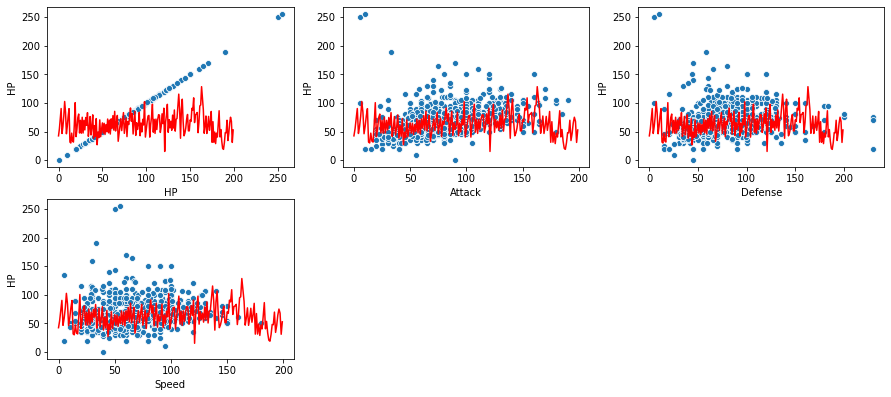

In [89]:
plt.figure(figsize = (15,10)) #horizontal & vertical size in inches
for i in enumerate(poke_stats):
    plt.subplot(3,3,i[0]+1)
    sns.scatterplot(data=poke_df, x=i[1], y = 'HP')
    px = np.arange(0,200,1)
    bias = 20
    py = (sgdr.coef_[1] * atk[px]) + (sgdr.coef_[2] * dfs[px]) + (sgdr.coef_[3]*spd[px]) + sgdr.intercept_
    plt.plot(py, 'r')
    plt.show
    
#g(x) = 0.36384525*x_1 + 0.27076375*x_2 + 0.25237602*x_3 + 0.29716996

In [75]:
#print GD 
#print("Average Intercept ", sgdr.average_intercept_)
print("Intercept: ", sgdr.intercept_)
print("Iterations until Convergence: ", sgdr.n_iter_)
print("Learning Rate: 0.01")

Intercept:  [0.29716996]
Iterations until Convergence:  12
Learning Rate: 0.01
